# <p style="text-align: center;">9. Decision Tree Classification</p>

<h2 style = "color:Brown;display:inline">Aim:   </h2>
<h3 style = "display:inline">
To demonstrate the process of the Decision Tree construction for classification problems using python programming.
</h3>

## Step 1: Import the wine dataset and split it into training and testing parts

In [13]:
from sklearn.datasets import load_wine
dataset = load_wine()
print("Feature Names:",dataset.feature_names)
print("Target Names:",dataset.target_names)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']


In [14]:
x = dataset.data
y = dataset.target
print("Dataset Input shape:",x.shape)
print("Dataset Output shape:",y.shape)

Dataset Input shape: (178, 13)
Dataset Output shape: (178,)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    ,random_state = 40
                                                    ,test_size = 0.15 )
print(("Training Data Input Shape:",x_train.shape))
print(("Training Data Output Shape:",y_train.shape))
print(("Test Data Input Shape:",x_test.shape))
print(("Test Data Output Shape:",y_test.shape))

('Training Data Input Shape:', (151, 13))
('Training Data Output Shape:', (151,))
('Test Data Input Shape:', (27, 13))
('Test Data Output Shape:', (27,))


## Step 2: Build the tree
### Import the class *DecisionTreeClassifier* from sklearn.tree module.
#### We can use parameter *croterion* to set the metric for the split. Possible metrics are 'gini' (default), 'entropy' or 'log_loss'.

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
tree2 = DecisionTreeClassifier(criterion = 'entropy')
tree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Step 3: Evaluate the performance of the tree

--> Compute both Training Accuracy and Test Accuracy to check overfitting

In [18]:
from sklearn.metrics import accuracy_score

training_accuracy = accuracy_score(y_train, tree1.predict(x_train))
test_accuracy = accuracy_score(y_test, tree1.predict(x_test))                               
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9259259259259259


In [19]:
training_accuracy2 = accuracy_score(y_train, tree2.predict(x_train))
test_accuracy2 = accuracy_score(y_test, tree2.predict(x_test))                               
print("Training Accuracy:", training_accuracy2)
print("Testing Accuracy:", test_accuracy2)

Training Accuracy: 1.0
Testing Accuracy: 0.9629629629629629


## Step 4: Visualize the tree
### Visual tree can be generated using *sklearn.tree.export_graphviz(tree, out_file, class_names, feature_names, impurity, filled)* function. Which return a .dot file with the reqired graph. 

[Text(0.375, 0.875, 'color_intensity <= 3.46\ngini = 0.656\nsamples = 151\nvalue = [49, 62, 40]\nclass = class_1'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]\nclass = class_1'),
 Text(0.5, 0.625, 'flavanoids <= 1.58\ngini = 0.599\nsamples = 102\nvalue = [49, 13, 40]\nclass = class_0'),
 Text(0.25, 0.375, 'hue <= 0.945\ngini = 0.13\nsamples = 43\nvalue = [0, 3, 40]\nclass = class_2'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = class_2'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = class_1'),
 Text(0.75, 0.375, 'proline <= 679.0\ngini = 0.282\nsamples = 59\nvalue = [49, 10, 0]\nclass = class_0'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]\nclass = class_1'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]\nclass = class_0')]

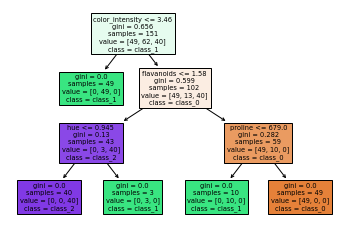

In [20]:
from sklearn.tree import plot_tree

plot_tree(tree1, class_names = dataset.target_names,
               feature_names = dataset.feature_names,impurity = True,
               filled = True)

## Step 5: Handle the overfitting by limiting the depth
### Use *max_depth* parameter with DecisionTreeClassifier() to limit the depth

In [21]:
tree1 = DecisionTreeClassifier(criterion="entropy",max_depth=4)
tree1.fit(x_train,y_train)
print("Training Accuracy:", accuracy_score(y_train,tree1.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, tree1.predict(x_test)))

Training Accuracy: 1.0
Test Accuracy: 1.0


[Text(0.4230769230769231, 0.9, 'flavanoids <= 1.575\nentropy = 1.562\nsamples = 151\nvalue = [49, 62, 40]\nclass = class_1'),
 Text(0.15384615384615385, 0.7, 'color_intensity <= 3.825\nentropy = 0.804\nsamples = 53\nvalue = [0, 13, 40]\nclass = class_2'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]\nclass = class_1'),
 Text(0.23076923076923078, 0.5, 'ash <= 2.06\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]\nclass = class_2'),
 Text(0.15384615384615385, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = class_2'),
 Text(0.6923076923076923, 0.7, 'proline <= 722.5\nentropy = 1.0\nsamples = 98\nvalue = [49, 49, 0]\nclass = class_0'),
 Text(0.5384615384615384, 0.5, 'magnesium <= 102.5\nentropy = 0.151\nsamples = 46\nvalue = [1, 45, 0]\nclass = class_1'),
 Text(0.46153846153846156, 0.3, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass

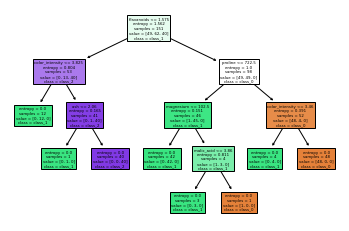

In [22]:
from sklearn.tree import plot_tree
plot_tree(tree1, class_names=dataset.target_names, feature_names=dataset.feature_names, impurity=True, filled=True)

<h2 style = "color:Brown;display:inline">Conclusion:   </h2>
<h3 style = "display:inline">
Hence, I demonstrated the process of constructing a Decision Tree for classification problems using Python programming.
</h3>